# Project Two: Logistic Regression and Random Forests

For Project Two, you have been asked to create different models analyzing a Heart Disease data set. Before beginning work on the project, be sure to read through the Project Two Guidelines and Rubric to understand what you need to do and how you will be graded on this assignment. Be sure to carefully review the Project Two Summary Report template, which contains all of the questions that you will need to answer about the regression analyses you are performing.

For this project, you will be writing all the scripts yourself. You may reference the textbook and your previous work on the problem sets to help you write the scripts.


### Scenario

You are a data analyst researching risk factors for heart disease at a university hospital. You have access to a large set of historical data that you can use to analyze patterns between different health indicators (e.g. fasting blood sugar, maximum heart rate, etc.) and the presence of heart disease. You have been asked to create different logistic regression models that predict whether or not a person is at risk for heart disease. A model like this could eventually be used to evaluate medical records and look for risks that might not be obvious to human doctors. You have also been asked to create a classification random forest model to predict the risk of heart disease and a regression random forest model to predict the maximum heart rate achieved.

There are several variables in this data set, but you will be working with the following important variables: 

| <div style="text-align: left"> Variable </div>  |   <div style="text-align: left"> What does it represent? </div> |
| -- | --  |
| <div style="text-align: left"> age </div> | <div style="text-align: left"> The person's age in years </div> |
| <div style="text-align: left"> sex </div> | <div style="text-align: left"> The person's sex (1 = male, 0 = female) </div> |
| <div style="text-align: left"> cp </div> | <div style="text-align: left"> The type of chest pain experienced (0=no pain, 1=typical angina, 2=atypical angina, 3=non-anginal pain) </div> |
| <div style="text-align: left"> trestbps </div> | <div style="text-align: left"> The person's resting blood pressure </div> |
| <div style="text-align: left"> chol </div> | <div style="text-align: left"> The person's cholesterol measurement in mg/dl </div> |
| <div style="text-align: left"> fbs </div> | <div style="text-align: left"> The person's fasting blood sugar is greater than 120 mg/dl (1 = true, 0 = false) </div> |
| <div style="text-align: left"> restecg </div> | <div style="text-align: left"> Resting electrocardiographic measurement (0=normal, 1=having ST-T wave abnormality, 2=showing probable or definite left ventricular hypertrophy by Estes' criteria) </div> |
| <div style="text-align: left"> thalach </div> | <div style="text-align: left"> The person's maximum heart rate achieved </div> |
| <div style="text-align: left"> exang </div> | <div style="text-align: left"> Exercise-induced angina (1=yes, 0=no) </div> |
| <div style="text-align: left"> oldpeak </div> | <div style="text-align: left"> ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot) </div> |
| <div style="text-align: left"> slope </div> | <div style="text-align: left"> The slope of the peak exercise ST segment (1=upsloping, 2=flat, 3=downsloping) </div> |
| <div style="text-align: left"> ca </div> | <div style="text-align: left"> The number of major vessels (0-3) </div> |
| <div style="text-align: left"> target </div> | <div style="text-align: left"> Heart disease (0=no, 1=yes) </div> |

**---------------------------------------------------------------------------------------------------------------------------**

## Install Libraries
In the following code block, you will install appropriate libraries to use in this project. 

Click the **Run** button on the toolbar to run this code.

In [18]:
install.packages("ResourceSelection")
install.packages("pROC")
install.packages("rpart.plot")

Installing package into '/home/codio/R/x86_64-pc-linux-gnu-library/3.4'
(as 'lib' is unspecified)
Installing package into '/home/codio/R/x86_64-pc-linux-gnu-library/3.4'
(as 'lib' is unspecified)
Installing package into '/home/codio/R/x86_64-pc-linux-gnu-library/3.4'
(as 'lib' is unspecified)


## Prepare Your Data Set

In the following code block, you have been given the R code to prepare your data set.

Click the **Run** button on the toolbar to run this code.

In [2]:
heart_data <- read.csv(file="heart_disease.csv", header=TRUE, sep=",")

# Converting appropriate variables to factors  
heart_data <- within(heart_data, {
   target <- factor(target)
   sex <- factor(sex)
   cp <- factor(cp)
   fbs <- factor(fbs)
   restecg <- factor(restecg)
   exang <- factor(exang)
   slope <- factor(slope)
   ca <- factor(ca)
   thal <- factor(thal)
})

head(heart_data, 10)

print("Number of variables")
ncol(heart_data)

print("Number of rows")
nrow(heart_data)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
<int>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>
62,1,2,130,231,0,1,146,0,1.8,1,3,3,1
58,0,0,130,197,0,1,131,0,0.6,1,0,2,1
60,0,3,150,240,0,1,171,0,0.9,2,0,2,1
63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
62,1,0,120,267,0,1,99,1,1.8,1,2,3,0
63,0,2,135,252,0,0,172,0,0.0,2,0,2,1
43,1,0,150,247,0,1,171,0,1.5,2,0,2,1
42,1,2,120,240,1,1,194,0,0.8,0,0,3,1
59,1,2,126,218,1,1,134,0,2.2,1,1,1,0


[1] "Number of variables"


[1] 14

[1] "Number of rows"


[1] 303

## Model #1 - First Logistic Regression Model

You have been asked to create a logistic regression model for heart disease *(target)* using the variables age *(age)*, resting blood pressure *(trestbps)*, and maximum heart rate achieved *(thalach)*. Before writing any code, review Section 3 of the Summary Report template to see the questions you will be answering about your logistic regression model.

Run your scripts to get the outputs of your regression analysis. Then use the outputs to answer the questions in your summary report.

**Note: Use the + (plus) button to add new code blocks, if needed.**

The general form of this regression model is:
<br><br>

\begin{equation*}
\Large E(y) = \frac{e^{({\beta}_0\ +\ {\beta}_1 {x}_1\ +\ {\beta}_2 {x}_2\ + \ {\beta}_3 {x}_3)}}{1+e^{({\beta}_0\ +\ {\beta}_1 {x}_1\ + \ {\beta}_2 {x}_2\ + \ {\beta}_3 {x}_3)}}
\end{equation*}
<br><br>


\begin{equation*}
\text{where y is 1 for having heart disease and 0 for not having heart disease,}\ {x}_1\ \text{is age,}
\end{equation*}

\begin{equation*}
\ \ {x}_2\ \text{is resting blood pressure, and }\ {x}_3\ \text{is maximum heart rate achieved.}
\end{equation*}
<br><br>

This can be transformed to form a model that is linear in the beta terms:
<br><br>

\begin{equation*}
\large ln(\frac{\pi}{1 - \pi }) = {\beta}_0\ +\ {\beta}_1 {x}_1\ + \ {\beta}_2 {x}_2\ + \ {\beta}_3 {x}_3
\end{equation*}
<br><br>

The left side of the equation above is the natural log of odds, so this can be written as:
<br><br>

\begin{equation*}
\large ln(\ odds\ ) = {\beta}_0\ +\ {\beta}_1 {x}_1\ + \ {\beta}_2 {x}_2\ + \ {\beta}_3 {x}_3
\end{equation*}
<br><br>

\begin{equation*}
\text{where odds is the odds of having heart disease (target=1)}
\end{equation*}
<br><br>

In [3]:
# Create the complete model1
logit1 <- glm(target ~ age + trestbps + thalach , data = heart_data, family = "binomial")

summary(logit1)


Call:
glm(formula = target ~ age + trestbps + thalach, family = "binomial", 
    data = heart_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0257  -1.0069   0.5688   0.9203   2.0476  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.576198   1.633928  -2.189   0.0286 *  
age         -0.009424   0.016080  -0.586   0.5578    
trestbps    -0.016019   0.007767  -2.063   0.0392 *  
thalach      0.042697   0.006950   6.144 8.06e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 417.64  on 302  degrees of freedom
Residual deviance: 353.28  on 299  degrees of freedom
AIC: 361.28

Number of Fisher Scoring iterations: 3


Our regression model from above is:
<br><br>

\begin{equation*}
\large E(y) = \frac{e^{(-3.5762\ -\ 0.0094 {x}_1\ -\ 0.0160 {x}_2\ +\ 0.0427 {x}_3)}}{1+e^{(-3.5762\ -\ 0.0094 {x}_1\ -\ 0.0160  {x}_2\ +\ 0.0427 {x}_3)}}
\end{equation*}
<br><br>


\begin{equation*}
\large ln({odds}) = -3.5762\ -\ 0.0094  {x}_1\ -\ 0.0160  {x}_2\ +\ 0.0427 {x}_3
\end{equation*}
<br><br>

In [4]:
#Hosmer-Lemeshow goodness of fit test 
library(ResourceSelection)


print("Hosmer-Lemeshow Goodness of Fit Test")
hl = hoslem.test(logit1$y, fitted(logit1), g=50)
hl

ResourceSelection 0.3-5 	 2019-07-22


[1] "Hosmer-Lemeshow Goodness of Fit Test"



	Hosmer and Lemeshow goodness of fit (GOF) test

data:  logit1$y, fitted(logit1)
X-squared = 41.978, df = 48, p-value = 0.7168


In [5]:
# Predict default or no_default for the data set using the model
default_model_data1 <- heart_data[c('age', 'trestbps', 'thalach')]
pred <- predict(logit1, newdata=default_model_data1, type='response')

# If the predicted probability of default is >=0.50 then predict credit default (default='1'), otherwise predict no credit 
# default (default='0') 
depvar_pred = as.factor(ifelse(pred >= 0.5, '1', '0'))

# This creates the confusion matrix
conf.matrix <- table(heart_data$target, depvar_pred)[c('0','1'),c('0','1')]
rownames(conf.matrix) <- paste("Actual", rownames(conf.matrix), sep = ": target=")
colnames(conf.matrix) <- paste("Prediction", colnames(conf.matrix), sep = ": target=")

# Print nicely formatted confusion matrix
print("Confusion Matrix")
format(conf.matrix,justify="centre",digit=2)

[1] "Confusion Matrix"


,Prediction: target=0,Prediction: target=1
Actual: target=0,83,55
Actual: target=1,38,127


Type 'citation("pROC")' for a citation.

Attaching package: 'pROC'

The following objects are masked from 'package:stats':

    cov, smooth, var

Setting levels: control = 0, case = 1
Setting direction: controls < cases


[1] "Area Under the Curve (AUC)"


[1] 0.7575

[1] "ROC Curve"


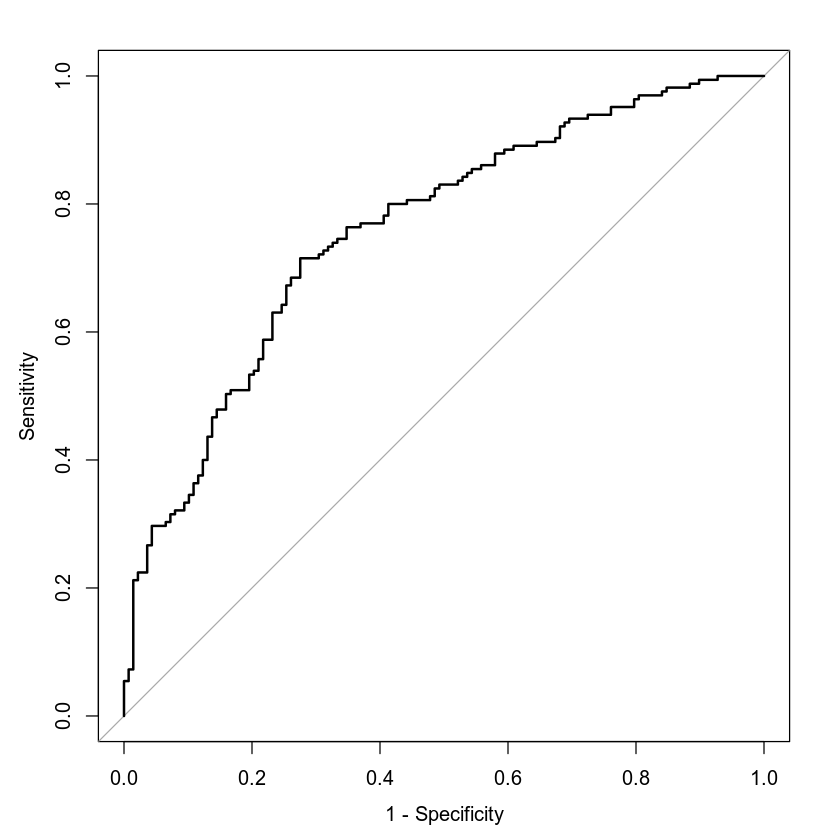

In [6]:
#Receiver Operating Characteristic 
library(pROC)

labels <- heart_data$target
predictions <- logit1$fitted.values

roc <- roc(labels ~ predictions)

print("Area Under the Curve (AUC)")
round(auc(roc),4)

print("ROC Curve")
# True Positive Rate (Sensitivity) and False Positive Rate (1 - Specificity)
plot(roc, legacy.axes = TRUE)

In [7]:
print("Prediction: age is 50, resting blood pressure of 122, and maximum heart rate of 140")
newdata1 <- data.frame(age=50, trestbps=122,thalach=140 )
pred1 <- predict(logit1, newdata1, type='response')
round(pred1, 4)

print("Prediction: age is 50, resting blood pressure of 140, and maximum heart rate of 170")
newdata2 <- data.frame(age=50, trestbps=140,thalach=170 )
pred2 <- predict(logit1, newdata2, type='response')
round(pred2, 4)

[1] "Prediction: age is 50, resting blood pressure of 122, and maximum heart rate of 140"


1 
0.4939

[1] "Prediction: age is 50, resting blood pressure of 140, and maximum heart rate of 170"


1 
0.7248

## Model #2 - Second Logistic Regression Model

You have been asked to create a logistic regression model for heart disease *(target)* using the variables maximum heart rate achieved *(thalach)*, age of the individual *(age)*, sex of the individual *(sex)*, exercise-induced angina *(exang)*, and type of chest pain *(cp)*. You also have to include the quadratic term for age and the interaction term between age and maximum heart rate achieved. Before writing any code, review Section 4 of the Summary Report template to see the questions you will be answering about your model.

Run your scripts to get the outputs of your analysis. Then use the outputs to answer the questions in your summary report.

**Note: Use the + (plus) button to add new code blocks, if needed.**

The general form of this regression model is:
<br><br>

\begin{equation*}
\Large E(y) = \frac{e^{({\beta}_0\ +\ {\beta}_1 {x}_1\ +\ {\beta}_2 {x}_2\ + \ {\beta}_3 {x}_3\ + \ {\beta}_4 {x}_4\ + \ {\beta}_5 {x}_5\ + \ {\beta}_6 {x}_6\ + \ {\beta}_7 {x}_7 + {\beta}_1 {x}_1 {\beta}_7 {x}_7 + {\beta}_1 {x}_1 ^ 2 )}}{1+e^{({\beta}_0\ +\ {\beta}_1 {x}_1\ +\ {\beta}_2 {x}_2\ + \ {\beta}_3 {x}_3\ + \ {\beta}_4 {x}_4\ + \ {\beta}_5 {x}_5\ + \ {\beta}_6 {x}_6\ + \ {\beta}_7 {x}_7 + {\beta}_1 {x}_1 {\beta}_7 {x}_7 + {\beta}_1 {x}_1 ^ 2 )}}
\end{equation*}
<br>


\begin{equation*}
\text{where y is 1 for having heart disease and 0 for not having heart disease,}\ {x}_1\ \text{is age,}
\end{equation*}

\begin{equation*}
\ \ {x}_2\ \text{is chest pain = 1 (typical angina), }\ {x}_3\ \text{is chest pain = 2 (atypical angina).}\ {x}_4\ \text{is chest pain = 3 (non-anginal pain).}
\end{equation*}

\begin{equation*}
\ {x}_5\ \text{exercise induced angina = 1.}\ {x}_6\ \text{is sex = 1 (male).}\ {x}_7\ \text{is maximum heart rate achieved.}
\end{equation*}

<br>
This can be transformed to form a model that is linear in the beta terms:

<br>

\begin{equation*}
\large ln(\frac{\pi}{1 - \pi }) = {\beta}_0\ +\ {\beta}_1 {x}_1\ + \ {\beta}_2 {x}_2\ + \ {\beta}_3 {x}_3\ + \ {\beta}_4 {x}_4\ + \ {\beta}_5 {x}_5\ + \ {\beta}_6 {x}_6\ + \ {\beta}_7 {x}_7 + {\beta}_8 {x}_1 {x}_7 + {\beta}_9 {x}_1 ^ 2
\end{equation*}
<br><br>

The left side of the equation above is the natural log of odds, so this can be written as:
<br><br>

\begin{equation*}
\large ln(\ odds\ ) = {\beta}_0\ +\ {\beta}_1 {x}_1\ + \ {\beta}_2 {x}_2\ + \ {\beta}_3 {x}_3\ + \ {\beta}_4 {x}_4\ + \ {\beta}_5 {x}_5\ + \ {\beta}_6 {x}_6\ + \ {\beta}_7 {x}_7 + {\beta}_8 {x}_1 {x}_7 + {\beta}_9 {x}_1 ^ 2
\end{equation*}
<br>

\begin{equation*}
\text{where odds is the odds of having heart disease (target=1)}
\end{equation*}
<br><br>

In [8]:
# Create the complete model1
logit2 <- glm(target ~ age + cp + exang + sex + thalach + age:thalach  + I(age^2), data = heart_data, family = "binomial")

summary(logit2)


Call:
glm(formula = target ~ age + cp + exang + sex + thalach + age:thalach + 
    I(age^2), family = "binomial", data = heart_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4225  -0.6167   0.2083   0.6646   2.5398  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.634e+01  1.205e+01  -1.356 0.175117    
age          2.049e-01  3.112e-01   0.658 0.510325    
cp1          1.766e+00  4.821e-01   3.663 0.000249 ***
cp2          1.820e+00  3.844e-01   4.734 2.21e-06 ***
cp3          1.674e+00  5.764e-01   2.904 0.003684 ** 
exang1      -9.348e-01  3.586e-01  -2.607 0.009133 ** 
sex1        -1.709e+00  3.590e-01  -4.762 1.91e-06 ***
thalach      1.390e-01  5.701e-02   2.438 0.014760 *  
I(age^2)     4.921e-04  2.054e-03   0.240 0.810599    
age:thalach -2.017e-03  9.999e-04  -2.017 0.043666 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Nu

In [9]:
#Hosmer-Lemeshow goodness of fit test 
library(ResourceSelection)


print("Hosmer-Lemeshow Goodness of Fit Test")
hl = hoslem.test(logit1$y, fitted(logit2), g=50)
hl

[1] "Hosmer-Lemeshow Goodness of Fit Test"



	Hosmer and Lemeshow goodness of fit (GOF) test

data:  logit1$y, fitted(logit2)
X-squared = 60.596, df = 48, p-value = 0.1048


In [10]:
# Predict default or no_default for the data set using the model
default_model_data2 <- heart_data[c('age','cp', 'exang','sex', 'thalach')]
pred <- predict(logit2, newdata=default_model_data2, type='response')

# If the predicted probability of default is >=0.50 then predict credit default (default='1'), otherwise predict no credit 
# default (default='0') 
depvar_pred = as.factor(ifelse(pred >= 0.5, '1', '0'))

# This creates the confusion matrix
conf.matrix <- table(heart_data$target, depvar_pred)[c('0','1'),c('0','1')]
rownames(conf.matrix) <- paste("Actual", rownames(conf.matrix), sep = ": target=")
colnames(conf.matrix) <- paste("Prediction", colnames(conf.matrix), sep = ": target=")

# Print nicely formatted confusion matrix
print("Confusion Matrix")
format(conf.matrix,justify="centre",digit=2)

[1] "Confusion Matrix"


,Prediction: target=0,Prediction: target=1
Actual: target=0,103,35
Actual: target=1,27,138


Setting levels: control = 0, case = 1
Setting direction: controls < cases


[1] "Area Under the Curve (AUC)"


[1] 0.8777

[1] "ROC Curve"


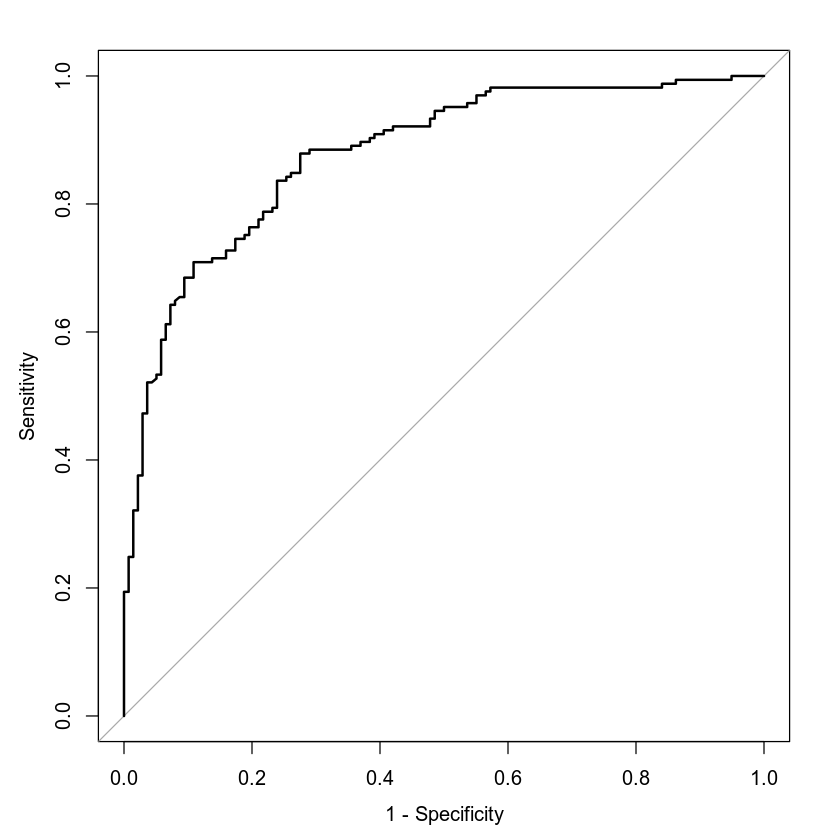

In [11]:
#Receiver Operating Characteristic 
library(pROC)

labels <- heart_data$target
predictions <- logit2$fitted.values

roc <- roc(labels ~ predictions)

print("Area Under the Curve (AUC)")
round(auc(roc),4)

print("ROC Curve")
# True Positive Rate (Sensitivity) and False Positive Rate (1 - Specificity)
plot(roc, legacy.axes = TRUE)

In [12]:
print("Prediction: sex is male, age is 30, experiences exercise induced angina, does not experience chest pain, and maximum heart rate of 145")
newdata3 <- data.frame( sex="1", age=30,cp="0", exang="1", thalach=145 )
pred3 <- predict(logit2, newdata3, type='response')
round(pred3, 4)

print("Prediction: sex is male, age is 30, does not experience exercise induced angina, does experience typical angina, and maximum heart rate of 145")
newdata4 <- data.frame( sex="1", age=30,cp="1", exang="0", thalach=145 )
pred4 <- predict(logit2, newdata4, type='response')
round(pred4, 4)

[1] "Prediction: sex is male, age is 30, experiences exercise induced angina, does not experience chest pain, and maximum heart rate of 145"


1 
0.2654

[1] "Prediction: sex is male, age is 30, does not experience exercise induced angina, does experience typical angina, and maximum heart rate of 145"


1 
0.8432

## Random Forest Classification Model

You have been asked to create a random forest classification model for the presence of heart disease *(target)* using the variables age *(age)*, sex *(sex)*, chest pain type *(cp)*, resting blood pressure *(trestbps)*, cholesterol measurement *(chol)*, resting electrocardiographic measurement *(restecg)*, exercise-induced angina *(exang)*, slope of peak exercise *(slope)*, and number of major vessels *(ca)*. Before writing any code, review Section 5 of the Summary Report template to see the questions you will be answering about your model.

Run your scripts to get the outputs of your regression analysis. Then use the outputs to answer the questions in your summary report.

**Note: Use the + (plus) button to add new code blocks, if needed.**

In [13]:
set.seed(511038)

# Partition the data set into training and testing data
samp.size = floor(0.80*nrow(heart_data))

# Training set
print("Number of rows for the training set")
train_ind = sample(seq_len(nrow(heart_data)), size = samp.size)
train.data = heart_data[train_ind,]
nrow(train.data)

# Testing set 
print("Number of rows for the testing set")
test.data = heart_data[-train_ind,]
nrow(test.data)

[1] "Number of rows for the training set"


[1] 242

[1] "Number of rows for the testing set"


[1] 61

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.


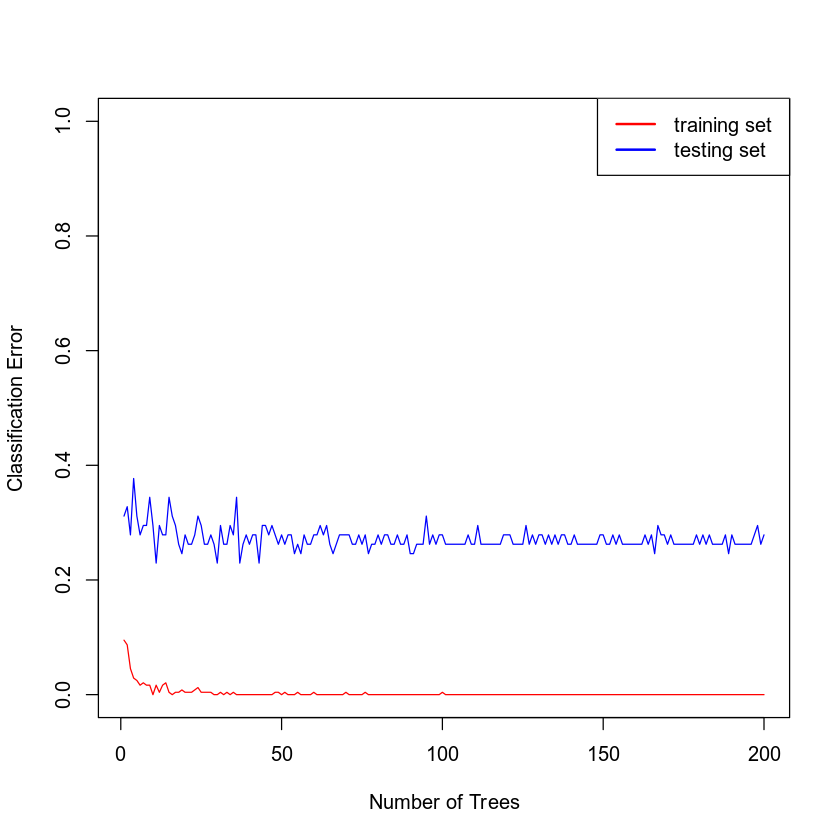

In [14]:
#Graphing the Training and Testing Error Against the Number of Trees
set.seed(511038)
library(randomForest)

# checking
#=====================================================================
train = c()
test = c()
trees = c()

for(i in seq(from=1, to=200, by=1)) {
    #print(i)
    
    trees <- c(trees, i)
    
    model_rf3 <- randomForest(target ~ age+sex+cp+trestbps+chol+restecg+exang+slope+ca, data=train.data, ntree = i)
    
    train.data.predict <- predict(model_rf3, train.data, type = "class")
    conf.matrix1 <- table(train.data$target, train.data.predict)
    train_error = 1-(sum(diag(conf.matrix1)))/sum(conf.matrix1)
    train <- c(train, train_error)
    
    test.data.predict <- predict(model_rf3, test.data, type = "class")
    conf.matrix2 <- table(test.data$target, test.data.predict)
    test_error = 1-(sum(diag(conf.matrix2)))/sum(conf.matrix2)
    test <- c(test, test_error)
}
 
#matplot (trees, cbind (train, test), ylim=c(0,0.5) , type = c("l", "l"), lwd=2, col=c("red","blue"), ylab="Error", xlab="number of trees")
#legend('topright',legend = c('training set','testing set'), col = c("red","blue"), lwd = 2 )

plot(trees, train,type = "l",ylim=c(0,1.0),col = "red", xlab = "Number of Trees", ylab = "Classification Error")
lines(test, type = "l", col = "blue")
legend('topright',legend = c('training set','testing set'), col = c("red","blue"), lwd = 2 )

In [15]:
set.seed(511038)
library(randomForest)
model_rf4 <- randomForest(target ~ age+sex+cp+trestbps+chol+restecg+exang+slope+ca, data=train.data, ntree = 50)

# Confusion matrix
print("======================================================================================================================")
print('Confusion Matrix: TRAINING set based on random forest model built using 50 trees')
train.data.predict <- predict(model_rf4, train.data, type = "class")

# Construct the confusion matrix
conf.matrix <- table(train.data$target, train.data.predict)[,c("0","1")]
rownames(conf.matrix) <- paste("Actual", rownames(conf.matrix), sep = ": ")
colnames(conf.matrix) <- paste("Prediction", colnames(conf.matrix), sep = ": ")

# Print nicely formatted confusion matrix
format(conf.matrix,justify="centre",digit=2)


print("======================================================================================================================")
print('Confusion Matrix: TESTING set based on random forest model built using 50 trees')
test.data.predict <- predict(model_rf4, test.data, type = "class")

# Construct the confusion matrix
conf.matrix <- table(test.data$target, test.data.predict)[,c('0','1')]
rownames(conf.matrix) <- paste("Actual", rownames(conf.matrix), sep = ": ")
colnames(conf.matrix) <- paste("Prediction", colnames(conf.matrix), sep = ": ")

# Print nicely formatted confusion matrix
format(conf.matrix,justify="centre",digit=2)


[1] "======================================================================================================================"
[1] "Confusion Matrix: TRAINING set based on random forest model built using 50 trees"


,Prediction: 0,Prediction: 1
Actual: 0,110,2
Actual: 1,0,130


[1] "======================================================================================================================"
[1] "Confusion Matrix: TESTING set based on random forest model built using 50 trees"


,Prediction: 0,Prediction: 1
Actual: 0,18,8
Actual: 1,8,27


## Random Forest Regression Model

You have been asked to create a random forest regression model for maximum heart rate achieved using the variables age *(age)*, sex *(sex)*, chest pain type *(cp)*, resting blood pressure *(trestbps)*, cholesterol measurement *(chol)*, resting electrocardiographic measurement *(restecg)*, exercise-induced angina *(exang)*, slope of peak exercise *(slope)*, and number of major vessels *(ca)*. Before writing any code, review Section 6 of the Summary Report template to see the questions you will be answering about your model.

Run your scripts to get the outputs of your analysis. Then use the outputs to answer the questions in your summary report.

**Note: Use the + (plus) button to add new code blocks, if needed.**

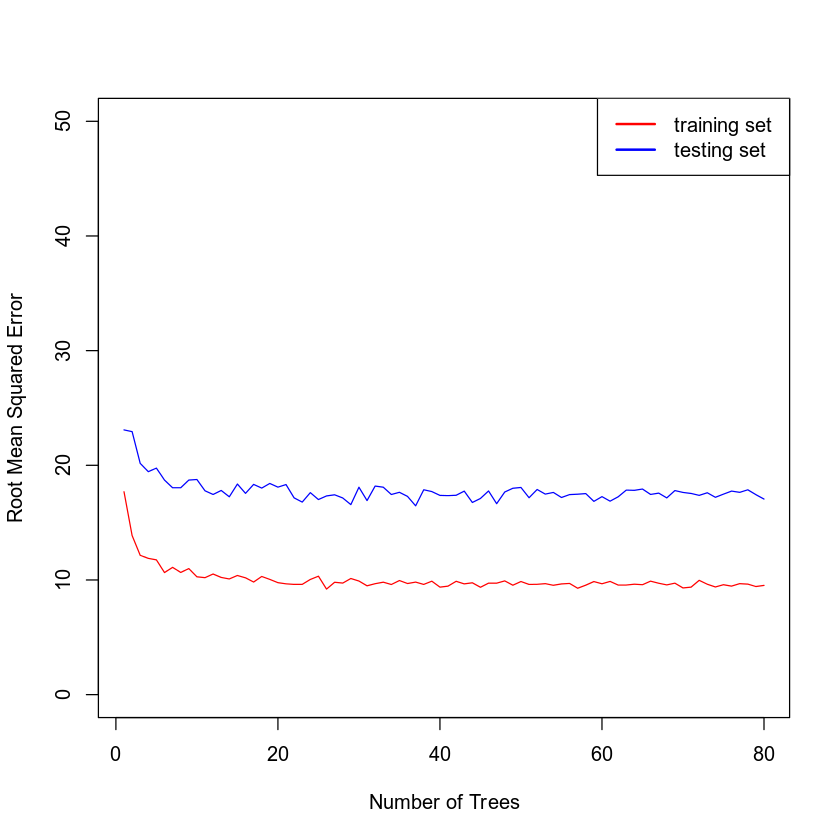

In [16]:
#Graphing the Training and Testing Root Mean Squared Error against the Number of Trees
set.seed(511038)
library(randomForest)

# Root mean squared error
RMSE = function(pred, obs) {
    return(sqrt( sum( (pred - obs)^2 )/length(pred) ) )
}


# checking
#=====================================================================
train = c()
test = c()
trees = c()

for(i in seq(from=1, to=80, by=1)) {
    trees <- c(trees, i)
    model_rf7 <- randomForest(thalach ~ age+sex+cp+trestbps+chol+restecg+exang+slope+ca, data=train.data, ntree = i)
    
    pred <- predict(model_rf7, newdata=train.data, type='response')
    rmse_train <-  RMSE(pred, train.data$thalach)
    train <- c(train, rmse_train)
    
    pred <- predict(model_rf7, newdata=test.data, type='response')
     rmse_test <-  RMSE(pred, test.data$thalach)
    test <- c(test, rmse_test)
}
 
plot(trees, train,type = "l",ylim=c(0,50),col = "red", xlab = "Number of Trees", ylab = "Root Mean Squared Error")
lines(test, type = "l", col = "blue")
legend('topright',legend = c('training set','testing set'), col = c("red","blue"), lwd = 2 )

In [17]:
set.seed(915839)
library(randomForest)
model_rf8 <- randomForest(thalach ~ age+sex+cp+trestbps+chol+restecg+exang+slope+ca, data=train.data, ntree = 25)


# Root mean squared error
RMSE = function(pred, obs) {
    return(sqrt( sum( (pred - obs)^2 )/length(pred) ) )
}

print("======================================================================================================================")
print('Root Mean Squared Error: TRAINING set based on random forest model built using 25 trees')
pred <- predict(model_rf8, newdata=train.data, type='response')
RMSE(pred, train.data$thalach)


print("======================================================================================================================")
print('Root Mean Squared Error: TESTING set based on random forest model built using 25 trees')
pred <- predict(model_rf8, newdata=test.data, type='response')
RMSE(pred, test.data$thalach)

[1] "======================================================================================================================"
[1] "Root Mean Squared Error: TRAINING set based on random forest model built using 25 trees"


[1] 9.597881

[1] "======================================================================================================================"
[1] "Root Mean Squared Error: TESTING set based on random forest model built using 25 trees"


[1] 18.22161

## End of Project Two Jupyter Notebook
The HTML output can be downloaded by clicking **File**, then **Download as**, then **HTML**. Be sure to answer all of the questions in the Summary Report template for Project Two, and to include your completed Jupyter Notebook scripts as part of your submission.